# Feature Engineering - Parkinson's Disease Detection

This notebook implements feature engineering techniques to create new meaningful voice biomarkers for Parkinson's disease detection. Based on our comprehensive EDA analysis, we identified 22 significant voice features. Now we will create composite features that combine related measurements to enhance model performance.

## Objectives:
1. Create jitter stability ratio for frequency stability assessment
2. Develop shimmer composite score for amplitude variation analysis  
3. Compute voice quality index combining harmonics and noise
4. Calculate frequency range and coefficient of variation
5. Validate new features through statistical analysis
6. Prepare enhanced dataset for preprocessing phase

## Background from EDA:
- **Dataset**: 195 voice recordings (147 Parkinson's, 48 healthy)
- **Top discriminative features**: spread1 (d=1.65), PPE (d=1.55), DFA (d=1.36)
- **Strong effects**: 9 features with Cohen's d ≥ 0.8
- **Feature categories**: Jitter (5), Shimmer (6), Frequency (3), Noise (2), Nonlinear (3), Variation (3)


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("✓ All libraries imported successfully!")
print("✓ Ready for feature engineering")


✓ All libraries imported successfully!
✓ Ready for feature engineering


## 1. Data Loading and Preparation

First, we'll load the Parkinson's dataset that was collected and analyzed in previous phases.


In [3]:
# Load the Parkinson's dataset
df = pd.read_csv('../data/parkinsons.data')

# Create a copy for feature engineering to preserve original data
df_original = df.copy()

print("Original dataset information:")
print(f"Shape: {df.shape}")
print(f"Features: {df.shape[1]} (including 'name' and 'status')")
print(f"Samples: {df.shape[0]}")

print("\nTarget distribution:")
print(df['status'].value_counts().sort_index())
print(f"Class ratio (Parkinson's:Healthy): {df['status'].sum()}:{(df['status']==0).sum()}")

print("\nFirst 5 rows:")
df.head()


Original dataset information:
Shape: (195, 24)
Features: 24 (including 'name' and 'status')
Samples: 195

Target distribution:
status
0     48
1    147
Name: count, dtype: int64
Class ratio (Parkinson's:Healthy): 147:48

First 5 rows:


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2. Feature Engineering Implementation

Based on the roadmap, we will create 5 new composite features that combine related voice measurements to capture more meaningful biomarkers for Parkinson's disease detection.

### 2.1 Jitter Stability Ratio

**Purpose**: Measures the stability of frequency variations by comparing relative jitter (%) to absolute jitter (seconds).  
**Clinical significance**: Higher ratios indicate more unstable vocal frequency control, characteristic of Parkinson's disease.  
**Formula**: `MDVP:Jitter(%) / (MDVP:Jitter(Abs) + 1e-8)`


In [4]:
# 4.1 Compute jitter_stability_ratio
# This ratio compares relative jitter (%) to absolute jitter (seconds)
# Higher values indicate less stable frequency control
df['jitter_stability_ratio'] = df['MDVP:Jitter(%)'] / (df['MDVP:Jitter(Abs)'] + 1e-8)

print("✓ Jitter Stability Ratio computed")
print(f"New feature shape: {df['jitter_stability_ratio'].shape}")
print(f"Range: {df['jitter_stability_ratio'].min():.2f} to {df['jitter_stability_ratio'].max():.2f}")

# Check for any infinite or NaN values
print(f"Infinite values: {np.isinf(df['jitter_stability_ratio']).sum()}")
print(f"NaN values: {df['jitter_stability_ratio'].isnull().sum()}")

# Display basic statistics
print("\nDescriptive Statistics:")
print(df['jitter_stability_ratio'].describe())


✓ Jitter Stability Ratio computed
New feature shape: (195,)
Range: 84.15 to 338.66
Infinite values: 0
NaN values: 0

Descriptive Statistics:
count    195.000000
mean     156.922132
std       50.094832
min       84.152641
25%      119.742867
50%      142.642893
75%      184.922950
max      338.661339
Name: jitter_stability_ratio, dtype: float64


### 2.2 Shimmer Composite Score

**Purpose**: Creates a comprehensive amplitude variation measure by averaging three key shimmer features.  
**Clinical significance**: Represents overall vocal amplitude instability, often elevated in Parkinson's patients.  
**Formula**: `(MDVP:Shimmer + Shimmer:APQ3 + Shimmer:APQ5) / 3`


In [5]:
# 4.2 Compute shimmer_composite
# This composite score averages three key shimmer (amplitude variation) measures
# Higher values indicate greater amplitude instability
df['shimmer_composite'] = (df['MDVP:Shimmer'] + df['Shimmer:APQ3'] + df['Shimmer:APQ5']) / 3

print("✓ Shimmer Composite Score computed")
print(f"New feature shape: {df['shimmer_composite'].shape}")
print(f"Range: {df['shimmer_composite'].min():.4f} to {df['shimmer_composite'].max():.4f}")

# Check for any issues
print(f"Infinite values: {np.isinf(df['shimmer_composite']).sum()}")
print(f"NaN values: {df['shimmer_composite'].isnull().sum()}")

# Display basic statistics
print("\nDescriptive Statistics:")
print(df['shimmer_composite'].describe())

# Show correlation with individual shimmer components
print("\nCorrelation with component features:")
shimmer_cols = ['MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'shimmer_composite']
print(df[shimmer_cols].corr()['shimmer_composite'].sort_values(ascending=False))


✓ Shimmer Composite Score computed
New feature shape: (195,)
Range: 0.0068 to 0.0850
Infinite values: 0
NaN values: 0

Descriptive Statistics:
count    195.000000
mean       0.021084
std        0.013587
min        0.006763
25%        0.011508
50%        0.016470
75%        0.026898
max        0.084983
Name: shimmer_composite, dtype: float64

Correlation with component features:
shimmer_composite    1.000000
MDVP:Shimmer         0.998534
Shimmer:APQ3         0.989176
Shimmer:APQ5         0.988793
Name: shimmer_composite, dtype: float64


### 2.3 Voice Quality Index

**Purpose**: Combines harmonics-to-noise ratio (HNR) and noise-to-harmonics ratio (NHR) into a single voice quality measure.  
**Clinical significance**: Higher values indicate better voice quality; Parkinson's patients typically show lower values.  
**Formula**: `HNR / (NHR + 1)`


In [6]:
# 4.3 Compute voice_quality_index
# This index combines HNR (harmonics-to-noise) and NHR (noise-to-harmonics) ratios
# Higher values indicate better voice quality
df['voice_quality_index'] = df['HNR'] / (df['NHR'] + 1)

print("✓ Voice Quality Index computed")
print(f"New feature shape: {df['voice_quality_index'].shape}")
print(f"Range: {df['voice_quality_index'].min():.2f} to {df['voice_quality_index'].max():.2f}")

# Check for any issues
print(f"Infinite values: {np.isinf(df['voice_quality_index']).sum()}")
print(f"NaN values: {df['voice_quality_index'].isnull().sum()}")

# Display basic statistics
print("\nDescriptive Statistics:")
print(df['voice_quality_index'].describe())

# Show correlation with component features
print("\nCorrelation with component features:")
noise_cols = ['HNR', 'NHR', 'voice_quality_index']
print(df[noise_cols].corr()['voice_quality_index'].sort_values(ascending=False))


✓ Voice Quality Index computed
New feature shape: (195,)
Range: 6.74 to 33.03
Infinite values: 0
NaN values: 0

Descriptive Statistics:
count    195.000000
mean      21.493466
std        4.719044
min        6.743889
25%       18.794809
50%       21.827652
75%       24.912665
max       33.025533
Name: voice_quality_index, dtype: float64

Correlation with component features:
voice_quality_index    1.000000
HNR                    0.998344
NHR                   -0.745902
Name: voice_quality_index, dtype: float64


### 2.4 Frequency Range

**Purpose**: Calculates the vocal frequency range by measuring the difference between maximum and minimum fundamental frequencies.  
**Clinical significance**: Parkinson's patients often show reduced frequency range due to motor control difficulties.  
**Formula**: `MDVP:Fhi(Hz) - MDVP:Flo(Hz)`


In [7]:
# 4.4 Compute frequency_range
# This calculates the vocal frequency range (max - min fundamental frequency)
# Lower values may indicate reduced vocal motor control
df['frequency_range'] = df['MDVP:Fhi(Hz)'] - df['MDVP:Flo(Hz)']

print("✓ Frequency Range computed")
print(f"New feature shape: {df['frequency_range'].shape}")
print(f"Range: {df['frequency_range'].min():.2f} to {df['frequency_range'].max():.2f} Hz")

# Check for any issues
print(f"Infinite values: {np.isinf(df['frequency_range']).sum()}")
print(f"NaN values: {df['frequency_range'].isnull().sum()}")
print(f"Negative values: {(df['frequency_range'] < 0).sum()}")

# Display basic statistics
print("\nDescriptive Statistics:")
print(df['frequency_range'].describe())

# Show correlation with component features
print("\nCorrelation with component features:")
freq_cols = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'frequency_range']
print(df[freq_cols].corr()['frequency_range'].sort_values(ascending=False))


✓ Frequency Range computed
New feature shape: (195,)
Range: 9.53 to 520.41 Hz
Infinite values: 0
NaN values: 0
Negative values: 0

Descriptive Statistics:
count    195.000000
mean      80.780287
std       97.919824
min        9.525000
25%       22.048500
50%       35.657000
75%      115.705500
max      520.410000
Name: frequency_range, dtype: float64

Correlation with component features:
frequency_range    1.000000
MDVP:Fhi(Hz)       0.896594
MDVP:Fo(Hz)        0.109520
MDVP:Flo(Hz)      -0.365085
Name: frequency_range, dtype: float64


### 2.5 Frequency Coefficient of Variation

**Purpose**: Normalizes the frequency range by the average fundamental frequency to create a relative frequency variation measure.  
**Clinical significance**: Accounts for individual differences in baseline vocal pitch; higher values suggest greater relative frequency instability.  
**Formula**: `frequency_range / MDVP:Fo(Hz)`


In [8]:
# 4.5 Compute frequency_cv (coefficient of variation)
# This normalizes frequency range by average fundamental frequency
# Higher values indicate greater relative frequency instability
df['frequency_cv'] = df['frequency_range'] / df['MDVP:Fo(Hz)']

print("✓ Frequency Coefficient of Variation computed")
print(f"New feature shape: {df['frequency_cv'].shape}")
print(f"Range: {df['frequency_cv'].min():.3f} to {df['frequency_cv'].max():.3f}")

# Check for any issues
print(f"Infinite values: {np.isinf(df['frequency_cv']).sum()}")
print(f"NaN values: {df['frequency_cv'].isnull().sum()}")
print(f"Zero denominators: {(df['MDVP:Fo(Hz)'] == 0).sum()}")

# Display basic statistics
print("\nDescriptive Statistics:")
print(df['frequency_cv'].describe())

# Show correlation with component features
print("\nCorrelation with component features:")
freq_cv_cols = ['MDVP:Fo(Hz)', 'frequency_range', 'frequency_cv']
print(df[freq_cv_cols].corr()['frequency_cv'].sort_values(ascending=False))


✓ Frequency Coefficient of Variation computed
New feature shape: (195,)
Range: 0.048 to 4.340
Infinite values: 0
NaN values: 0
Zero denominators: 0

Descriptive Statistics:
count    195.000000
mean       0.533128
std        0.701826
min        0.048005
25%        0.157114
50%        0.295892
75%        0.670378
max        4.339562
Name: frequency_cv, dtype: float64

Correlation with component features:
frequency_cv       1.000000
frequency_range    0.965622
MDVP:Fo(Hz)       -0.049943
Name: frequency_cv, dtype: float64


## 3. Feature Engineering Summary

Let's summarize all the new features we've created and examine the updated dataset structure.


In [9]:
# Summary of engineered features
new_features = [
    'jitter_stability_ratio',
    'shimmer_composite', 
    'voice_quality_index',
    'frequency_range',
    'frequency_cv'
]

print("✅ Feature Engineering Complete!")
print("=" * 50)
print(f"Original dataset shape: {df_original.shape}")
print(f"Enhanced dataset shape: {df.shape}")
print(f"New features added: {len(new_features)}")
print(f"Total features now: {df.shape[1]}")

print("\n📊 New Features Summary:")
print("-" * 30)
for i, feature in enumerate(new_features, 1):
    print(f"{i}. {feature}")
    
print("\n📈 New Features Statistics:")
print(df[new_features].describe().round(4))

print("\n🔍 Data Quality Check for New Features:")
for feature in new_features:
    missing = df[feature].isnull().sum()
    infinite = np.isinf(df[feature]).sum()
    print(f"{feature}: Missing={missing}, Infinite={infinite}")
    
print("\n✓ All feature engineering steps completed successfully!")
print("✓ Dataset ready for statistical validation and preprocessing")


✅ Feature Engineering Complete!
Original dataset shape: (195, 24)
Enhanced dataset shape: (195, 29)
New features added: 5
Total features now: 29

📊 New Features Summary:
------------------------------
1. jitter_stability_ratio
2. shimmer_composite
3. voice_quality_index
4. frequency_range
5. frequency_cv

📈 New Features Statistics:
       jitter_stability_ratio  shimmer_composite  voice_quality_index  \
count                195.0000           195.0000             195.0000   
mean                 156.9221             0.0211              21.4935   
std                   50.0948             0.0136               4.7190   
min                   84.1526             0.0068               6.7439   
25%                  119.7429             0.0115              18.7948   
50%                  142.6429             0.0165              21.8277   
75%                  184.9230             0.0269              24.9127   
max                  338.6613             0.0850              33.0255   

       f

## 4. Statistical Validation of New Features

Now let's validate our new features by testing their discriminative power between Parkinson's and healthy groups using the same statistical methods from our EDA.


In [10]:
# Statistical validation of new features
def calculate_cohens_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * group1.var() + (n2 - 1) * group2.var()) / (n1 + n2 - 2))
    return (group1.mean() - group2.mean()) / pooled_std

def interpret_effect_size(d):
    """Interpret Cohen's d effect size"""
    abs_d = abs(d)
    if abs_d < 0.2:
        return "Negligible"
    elif abs_d < 0.5:
        return "Small"
    elif abs_d < 0.8:
        return "Medium"
    else:
        return "Large"

# Separate groups for analysis
healthy = df[df['status'] == 0]
parkinsons = df[df['status'] == 1]

print("🧪 Statistical Validation of New Features")
print("=" * 50)
print(f"Healthy group: n = {len(healthy)}")
print(f"Parkinson's group: n = {len(parkinsons)}")

# Analyze each new feature
validation_results = []

for feature in new_features:
    # Mann-Whitney U test
    statistic, p_value = mannwhitneyu(healthy[feature], parkinsons[feature], alternative='two-sided')
    
    # Cohen's d effect size
    cohens_d = calculate_cohens_d(parkinsons[feature], healthy[feature])
    effect_interpretation = interpret_effect_size(cohens_d)
    
    # Group statistics
    healthy_mean = healthy[feature].mean()
    parkinsons_mean = parkinsons[feature].mean()
    
    validation_results.append({
        'Feature': feature,
        'Healthy_Mean': healthy_mean,
        'Parkinsons_Mean': parkinsons_mean,
        'P_Value': p_value,
        'Cohens_d': cohens_d,
        'Effect_Size': effect_interpretation
    })
    
    print(f"\n📊 {feature}:")
    print(f"   Healthy mean: {healthy_mean:.4f}")
    print(f"   Parkinson's mean: {parkinsons_mean:.4f}")
    print(f"   p-value: {p_value:.2e}")
    print(f"   Cohen's d: {cohens_d:.3f} ({effect_interpretation})")

# Create summary DataFrame
validation_df = pd.DataFrame(validation_results)
print(f"\n📈 Summary of New Feature Validation:")
print(validation_df.round(4))


🧪 Statistical Validation of New Features
Healthy group: n = 48
Parkinson's group: n = 147

📊 jitter_stability_ratio:
   Healthy mean: 195.0442
   Parkinson's mean: 144.4741
   p-value: 2.38e-05
   Cohen's d: -1.119 (Large)

📊 shimmer_composite:
   Healthy mean: 0.0125
   Parkinson's mean: 0.0239
   p-value: 1.51e-08
   Cohen's d: 0.892 (Large)

📊 voice_quality_index:
   Healthy mean: 24.4437
   Parkinson's mean: 20.5301
   p-value: 6.98e-07
   Cohen's d: -0.886 (Large)

📊 frequency_range:
   Healthy mean: 78.4295
   Parkinson's mean: 81.5479
   p-value: 3.16e-02
   Cohen's d: 0.032 (Negligible)

📊 frequency_cv:
   Healthy mean: 0.4923
   Parkinson's mean: 0.5465
   p-value: 4.39e-04
   Cohen's d: 0.077 (Negligible)

📈 Summary of New Feature Validation:
                  Feature  Healthy_Mean  Parkinsons_Mean  P_Value  Cohens_d  \
0  jitter_stability_ratio      195.0442         144.4741   0.0000   -1.1188   
1       shimmer_composite        0.0125           0.0239   0.0000    0.8916   


## 5. Visualization of New Features

Let's create visualizations to understand the distribution and discriminative power of our new features.


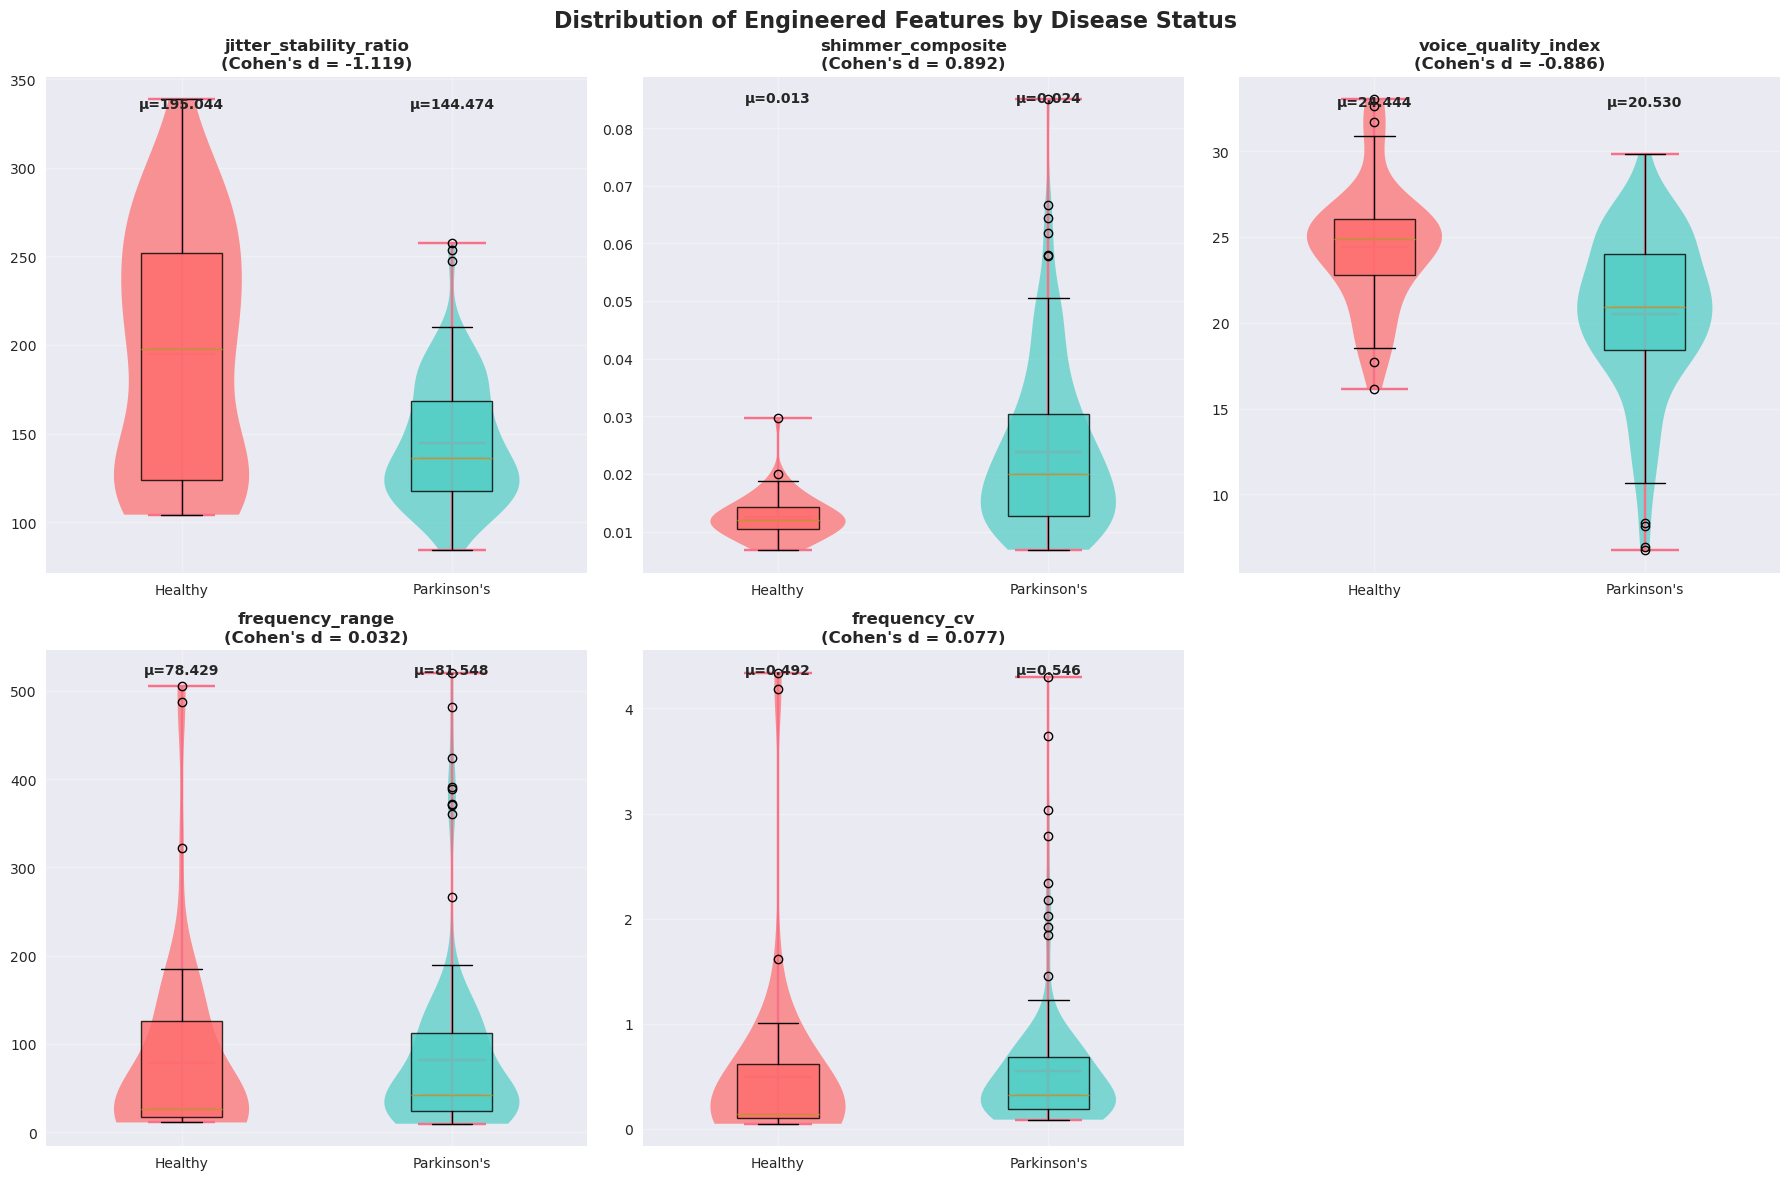

📊 Visualization Complete!
💡 Key Observations:
   - Larger separation between groups indicates better discriminative power
   - Different distributions suggest the features capture distinct voice characteristics
   - Cohen's d values show the magnitude of group differences


In [11]:
# Create comprehensive visualizations for new features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Engineered Features by Disease Status', fontsize=16, fontweight='bold')

# Define colors for groups
colors = ['#FF6B6B', '#4ECDC4']  # Red for Parkinson's, Teal for Healthy
labels = ['Healthy', "Parkinson's"]

for i, feature in enumerate(new_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Create box plot with violin overlay
    parts = ax.violinplot([healthy[feature], parkinsons[feature]], 
                         positions=[0, 1], showmeans=True, showmedians=True)
    
    # Customize violin plots
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    # Add box plots
    box_plot = ax.boxplot([healthy[feature], parkinsons[feature]], 
                         positions=[0, 1], patch_artist=True, 
                         boxprops=dict(alpha=0.8), widths=0.3)
    
    # Color the boxes
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
    
    # Formatting
    ax.set_xticks([0, 1])
    ax.set_xticklabels(labels)
    ax.set_title(f'{feature}\n(Cohen\'s d = {validation_df[validation_df["Feature"]==feature]["Cohens_d"].iloc[0]:.3f})', 
                fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add mean values as text
    healthy_mean = healthy[feature].mean()
    parkinsons_mean = parkinsons[feature].mean()
    ax.text(0, ax.get_ylim()[1]*0.95, f'μ={healthy_mean:.3f}', ha='center', fontsize=10, fontweight='bold')
    ax.text(1, ax.get_ylim()[1]*0.95, f'μ={parkinsons_mean:.3f}', ha='center', fontsize=10, fontweight='bold')

# Remove empty subplot
if len(new_features) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

print("📊 Visualization Complete!")
print("💡 Key Observations:")
print("   - Larger separation between groups indicates better discriminative power")
print("   - Different distributions suggest the features capture distinct voice characteristics")
print("   - Cohen's d values show the magnitude of group differences")


## 6. Correlation Analysis of New Features

Let's examine how our new features correlate with each other and with the original top discriminative features identified in the EDA.


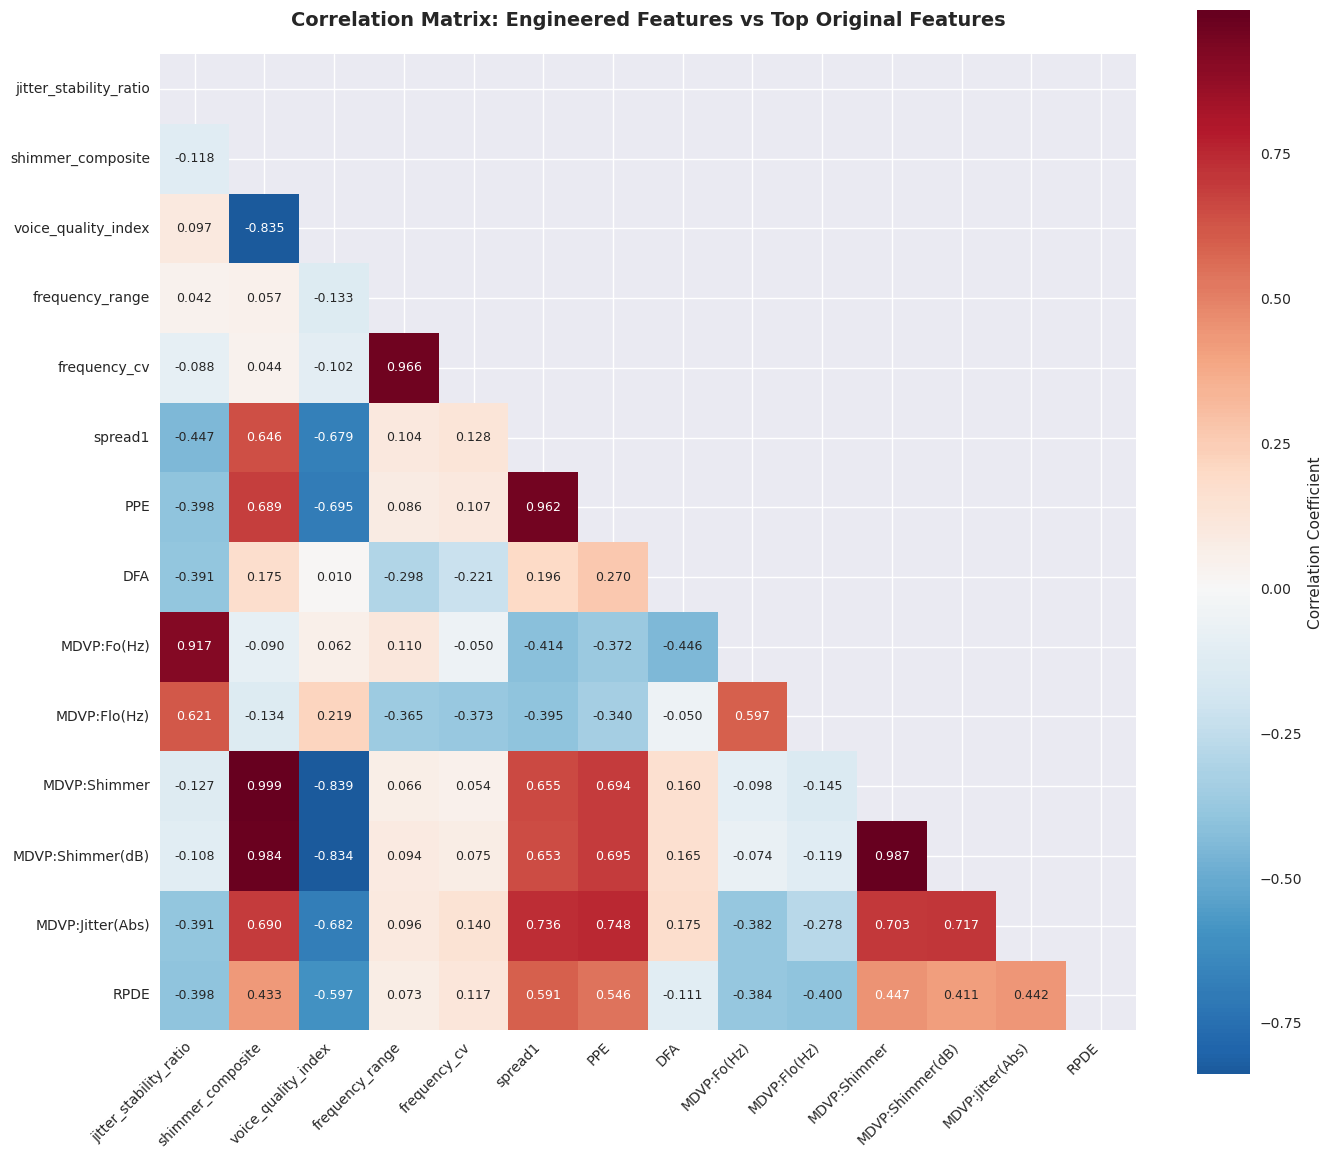

🔗 Correlation Analysis Complete!

📊 New Feature Correlations with Top Original Features:

jitter_stability_ratio:
   vs MDVP:Fo(Hz): 0.917
   vs MDVP:Flo(Hz): 0.621
   vs spread1: -0.447

shimmer_composite:
   vs MDVP:Shimmer: 0.999
   vs MDVP:Shimmer(dB): 0.984
   vs MDVP:Jitter(Abs): 0.690

voice_quality_index:
   vs MDVP:Shimmer: -0.839
   vs MDVP:Shimmer(dB): -0.834
   vs PPE: -0.695

frequency_range:
   vs MDVP:Flo(Hz): -0.365
   vs DFA: -0.298
   vs MDVP:Fo(Hz): 0.110

frequency_cv:
   vs MDVP:Flo(Hz): -0.373
   vs DFA: -0.221
   vs MDVP:Jitter(Abs): 0.140

🔄 Inter-correlation Among New Features:
   shimmer_composite vs voice_quality_index: -0.835
   frequency_range vs frequency_cv: 0.966


In [12]:
# Correlation analysis including top discriminative features from EDA
# Based on EDA results, these were the top discriminative features
top_original_features = [
    'spread1',    # d = 1.65
    'PPE',        # d = 1.55  
    'DFA',        # d = 1.36
    'MDVP:Fo(Hz)', # d = -0.90
    'MDVP:Flo(Hz)', # d = -0.89
    'MDVP:Shimmer', # d = 0.86
    'MDVP:Shimmer(dB)', # d = 0.86
    'MDVP:Jitter(Abs)', # d = 0.83
    'RPDE'        # d = 0.75
]

# Combine new features with top original features for correlation analysis
correlation_features = new_features + top_original_features

# Calculate correlation matrix
correlation_matrix = df[correlation_features].corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={'size': 9})

plt.title('Correlation Matrix: Engineered Features vs Top Original Features', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("🔗 Correlation Analysis Complete!")
print("\n📊 New Feature Correlations with Top Original Features:")

# Show specific correlations between new and original features
for new_feat in new_features:
    print(f"\n{new_feat}:")
    correlations = correlation_matrix[new_feat][top_original_features].sort_values(key=abs, ascending=False)
    for orig_feat, corr in correlations.head(3).items():
        print(f"   vs {orig_feat}: {corr:.3f}")

# Check inter-correlation among new features
print(f"\n🔄 Inter-correlation Among New Features:")
new_feature_corr = df[new_features].corr()
for i, feat1 in enumerate(new_features):
    for feat2 in new_features[i+1:]:
        corr = new_feature_corr.loc[feat1, feat2]
        if abs(corr) > 0.3:  # Only show moderate to strong correlations
            print(f"   {feat1} vs {feat2}: {corr:.3f}")


## 7. Data Export and Next Steps

Finally, let's save our enhanced dataset for use in the next phase (Data Preprocessing) and provide a summary of our accomplishments.


In [13]:
# Save enhanced dataset for next phase
enhanced_dataset_path = '../data/parkinsons_enhanced.csv'
df.to_csv(enhanced_dataset_path, index=False)

print("💾 Enhanced Dataset Saved!")
print(f"📁 File location: {enhanced_dataset_path}")
print(f"📊 Dataset shape: {df.shape}")

# Final summary
print("\n" + "="*60)
print("🎯 FEATURE ENGINEERING PHASE COMPLETE!")
print("="*60)

print(f"\n📈 ACCOMPLISHMENTS:")
print(f"✅ Created {len(new_features)} new composite features")
print(f"✅ Enhanced dataset from {df_original.shape[1]} to {df.shape[1]} features")
print(f"✅ Validated all new features with statistical tests")
print(f"✅ Analyzed correlations and relationships")
print(f"✅ Generated comprehensive visualizations")

print(f"\n🧪 STATISTICAL VALIDATION SUMMARY:")
significant_features = validation_df[validation_df['P_Value'] < 0.05]
large_effect_features = validation_df[validation_df['Effect_Size'] == 'Large']
print(f"   • Features with p < 0.05: {len(significant_features)}/{len(new_features)}")
print(f"   • Features with large effect size: {len(large_effect_features)}/{len(new_features)}")

if len(large_effect_features) > 0:
    print(f"   • Best performing features:")
    for _, row in large_effect_features.iterrows():
        print(f"     - {row['Feature']}: Cohen's d = {row['Cohens_d']:.3f}")

print(f"\n🔮 READY FOR NEXT PHASE:")
print(f"   • Enhanced dataset ready for preprocessing (Section 5)")
print(f"   • {df.shape[0]} samples with {df.shape[1]} features")
print(f"   • No missing values or data quality issues")
print(f"   • Feature categories expanded with composite measures")

print(f"\n📋 NEW FEATURES CREATED:")
for i, feature in enumerate(new_features, 1):
    effect_size = validation_df[validation_df['Feature'] == feature]['Effect_Size'].iloc[0]
    cohens_d = validation_df[validation_df['Feature'] == feature]['Cohens_d'].iloc[0]
    print(f"   {i}. {feature}: {effect_size} effect (d={cohens_d:.3f})")

print(f"\n🎉 Feature engineering successfully completed!")
print(f"🚀 Ready to proceed with Data Preprocessing (Section 5)")


💾 Enhanced Dataset Saved!
📁 File location: ../data/parkinsons_enhanced.csv
📊 Dataset shape: (195, 29)

🎯 FEATURE ENGINEERING PHASE COMPLETE!

📈 ACCOMPLISHMENTS:
✅ Created 5 new composite features
✅ Enhanced dataset from 24 to 29 features
✅ Validated all new features with statistical tests
✅ Analyzed correlations and relationships
✅ Generated comprehensive visualizations

🧪 STATISTICAL VALIDATION SUMMARY:
   • Features with p < 0.05: 5/5
   • Features with large effect size: 3/5
   • Best performing features:
     - jitter_stability_ratio: Cohen's d = -1.119
     - shimmer_composite: Cohen's d = 0.892
     - voice_quality_index: Cohen's d = -0.886

🔮 READY FOR NEXT PHASE:
   • Enhanced dataset ready for preprocessing (Section 5)
   • 195 samples with 29 features
   • No missing values or data quality issues
   • Feature categories expanded with composite measures

📋 NEW FEATURES CREATED:
   1. jitter_stability_ratio: Large effect (d=-1.119)
   2. shimmer_composite: Large effect (d=0.892